In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
combined_df = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")
combined_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# checking number of mice
mousec = combined_df["Mouse ID"].count()
mousec

1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duprows = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
duprows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
#clean dataframe
cleandata = combined_df.drop_duplicates("Mouse ID")
cleandata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
data_grouped = combined_df.groupby(["Drug Regimen"])
data_grouped


mean = data_grouped["Tumor Volume (mm3)"].mean()
median = data_grouped["Tumor Volume (mm3)"].median()
variance = data_grouped["Tumor Volume (mm3)"].var()
std = data_grouped["Tumor Volume (mm3)"].std()
sem = data_grouped["Tumor Volume (mm3)"].sem()


summary_stats = pd.DataFrame({"Mean": mean, "Median":median, "Variance":variance, "Standard Deviation": std, "SEM": sem})

summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
oneline = combined_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
oneline

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

Text(0, 0.5, 'Number of mouse tested')

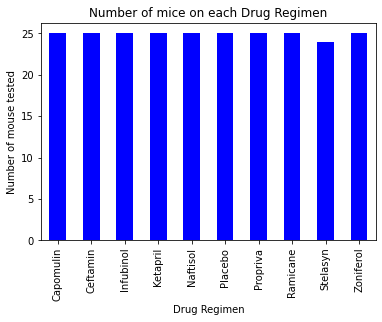

In [8]:
mice_data = combined_df.groupby(["Drug Regimen"])["Mouse ID"].nunique()
ax = mice_data.plot(kind="bar",title ="Number of mice on each Drug Regimen",facecolor="blue")
ax.set_ylabel("Number of mouse tested")

Male      125
Female    124
Name: Sex, dtype: int64

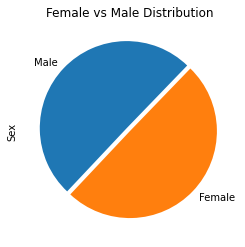

In [9]:
mouse_gender = combined_df[["Mouse ID", "Sex"]].drop_duplicates()

colors = ["orange","blue"]
explode=(0.05,0)

sex_distribution = mouse_gender["Sex"].value_counts()
s = sex_distribution.plot(kind="pie", title="Female vs Male Distribution", startangle=46, explode=explode)
sex_distribution

In [10]:
newcombined_df=combined_df[['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)']]

In [11]:
sorted_df=newcombined_df.sort_values(['Mouse ID','Timepoint'], ascending=False) # Sort new dataframe by columns 'Mouse ID' and 'Timepoint'.
sorted_df

no_dupl_sorted_df=sorted_df.drop_duplicates(subset='Mouse ID') # Drop duplicates in column 'Mouse ID' to leave only IDs with final timepoints (*** this can be used as well--> df.drop_duplicates(subset='Mouse ID', keep='first')***).
#no_dupl_sorted_df

In [12]:
capomulin_df=no_dupl_sorted_df[no_dupl_sorted_df['Drug Regimen'] == 'Capomulin']
capomulin_df.sort_values(['Mouse ID']).head(10)

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
309,b128,Capomulin,45,38.982878
299,b742,Capomulin,45,38.939633
64,f966,Capomulin,20,30.485985
244,g288,Capomulin,45,37.074024
360,g316,Capomulin,45,40.159220
440,i557,Capomulin,45,47.685963
204,i738,Capomulin,45,37.311846
337,j119,Capomulin,45,38.125164
317,j246,Capomulin,35,38.753265
380,l509,Capomulin,45,41.483008


In [13]:
timepoint = combined_df.groupby("Mouse ID")["Timepoint"].max()

vol_df = pd.merge(combined_df, timepoint, how="inner", on=["Mouse ID", "Timepoint"])

In [14]:
list_of_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

tumor_vol = []

for drug in list_of_drugs:
    volume_df = vol_df.loc[vol_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_vol.append(volume_df)
    quartiles = volume_df.quantile([0.25,0.5,0.75])

    iqr = quartiles[0.75] - quartiles[0.25]

    lower_bound = quartiles[0.25] - (1.5*iqr)
    upper_bound = quartiles[0.75] + (1.5*iqr)

    

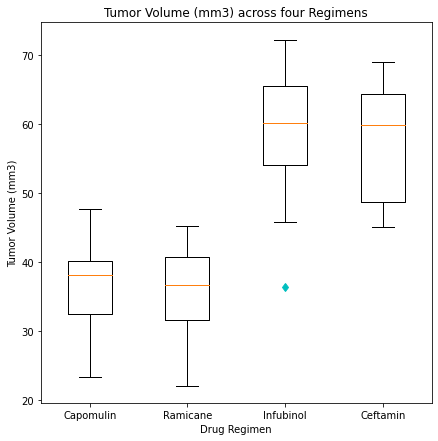

In [15]:
blue_dot = dict(markerfacecolor="c",marker="d", markeredgecolor="c")
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.boxplot(tumor_vol, flierprops=blue_dot)
ax1.set_title("Tumor Volume (mm3) across four Regimens")
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.xaxis.set(ticks=range(1,len(list_of_drugs) + 1),ticklabels=list_of_drugs)

plt.show()

In [16]:
mousesort=combined_df.loc[combined_df['Mouse ID']=='s185',:]
target_mouse=mousesort.sort_values('Timepoint')

target_mouse_plot=target_mouse[['Timepoint','Tumor Volume (mm3)']]

target_mouse_plot=target_mouse_plot.set_index('Timepoint')


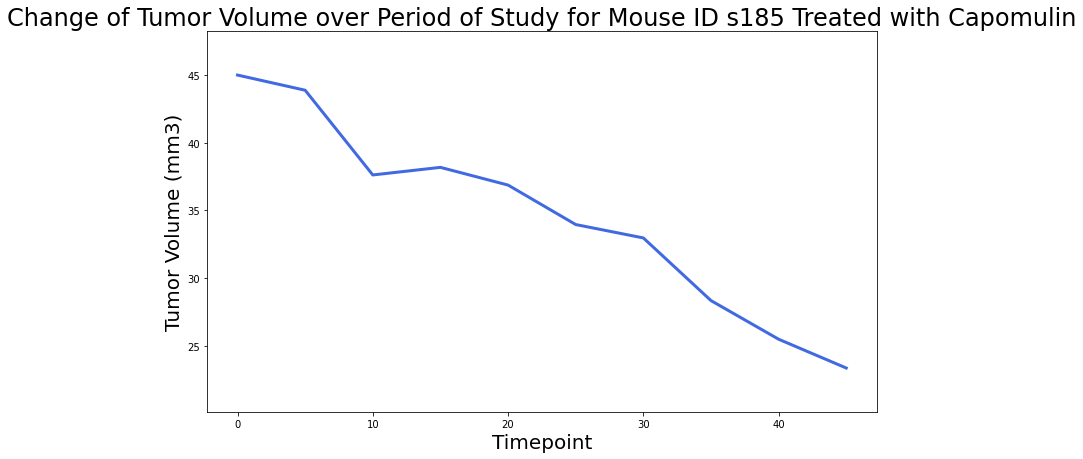

In [17]:
# Plot
target_mouse_plot.plot(linewidth=3, color='royalblue', figsize=(12, 7))

# Set x-label, y-label, and a title:
plt.title('Change of Tumor Volume over Period of Study for Mouse ID s185 Treated with Capomulin', fontsize=24)
plt.xlabel('Timepoint', fontsize=20, color='black')
plt.ylabel('Tumor Volume (mm3)', fontsize=20, color='black')
plt.legend('',frameon=False)
plt.axis("equal")

plt.show()


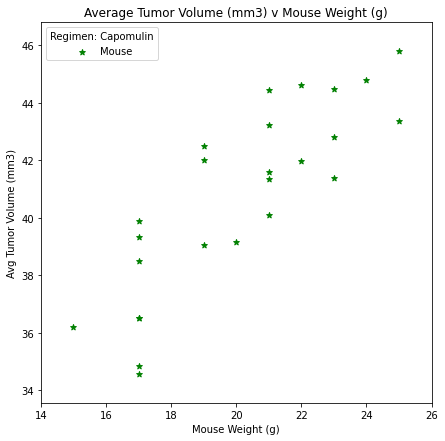

In [18]:
#correlation
specimen = combined_df.loc[combined_df["Drug Regimen"]== "Capomulin"]
volume = specimen.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
weight = specimen.groupby(["Mouse ID"])["Weight (g)"].mean()

mvol = pd.merge(volume,weight, on="Mouse ID", how="inner")
mvol = mvol.rename(columns={"Tumor Volume (mm3)": "Avg Tumor Volume (mm3)"})
vol = mvol.iloc[:,0]
wt = mvol.iloc[:,1]

fig, ax = plt.subplots(figsize=(7,7))
ax.set_autoscale_on(True)
ax.scatter(wt, vol, marker="*", facecolors="green", edgecolors="green")
ax.legend(["Mouse"],loc="upper left", title="Regimen: Capomulin")
plt.title("Average Tumor Volume (mm3) v Mouse Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.xlabel("Mouse Weight (g)")
plt.ylim(vol.min() - 1, vol.max() + 1)
plt.xlim(wt.min() - 1, wt.max() + 1)

plt.show()